In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [254]:
titanic=pd.read_csv("datasets/train.csv")
test=pd.read_csv('datasets/test.csv')

In [255]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


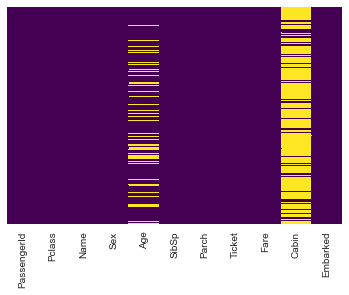

In [256]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

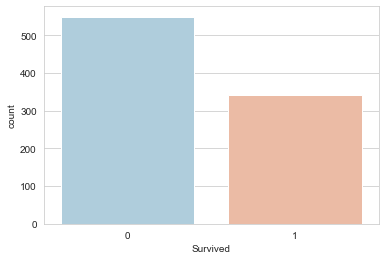

In [257]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic,palette='RdBu_r')

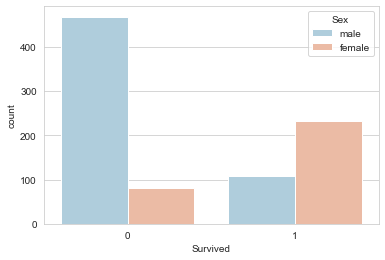

In [258]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='RdBu_r')

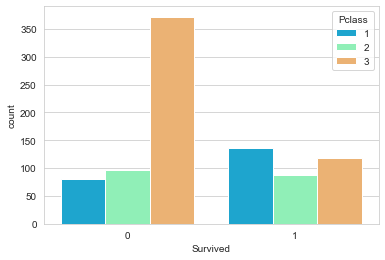

In [259]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')

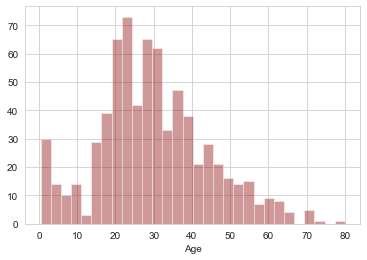

In [260]:
sns.distplot(titanic['Age'].dropna(),kde=False,color='darkred',bins=30)

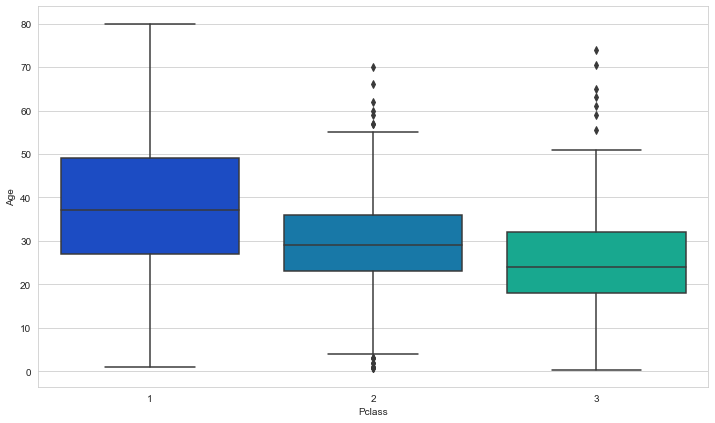

In [261]:
plt.figure(figsize=(12,7))
sns.boxplot(x ='Pclass',y='Age',data=titanic,palette='winter')

In [262]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [263]:
titanic['Age']=titanic[['Age','Pclass']].apply(impute_age,axis=1)
test['Age']=titanic[['Age','Pclass']].apply(impute_age,axis=1)

In [264]:
test.fillna(X_test.mean())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,22.0,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,38.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,26.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,35.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,29.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,44.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,24.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,34.0,0,0,359309,8.0500,NaN,S


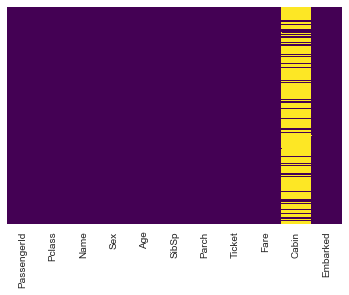

In [265]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [266]:
titanic.drop('Cabin',axis='columns',inplace=True)
test.drop('Cabin',axis='columns',inplace=True)

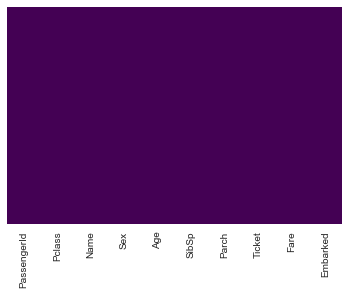

In [267]:
titanic=titanic.dropna()
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [268]:
subT=titanic[['Pclass','Sex','SibSp','Parch','Fare','Embarked']]
subT.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,1,0,7.2500,S
1,1,female,1,0,71.2833,C
2,3,female,0,0,7.9250,S
3,1,female,1,0,53.1000,S
4,3,male,0,0,8.0500,S


In [269]:
Embarked_dummies=pd.get_dummies(subT.Embarked,prefix='Embarked')
Sex_dummies=pd.get_dummies(subT.Sex,prefix='Sex')
Pclass_dummies=pd.get_dummies(subT.Pclass,prefix='Pclass')
df_with_dummies=pd.concat([subT,Embarked_dummies,Sex_dummies,Pclass_dummies],axis='columns')
df_with_dummies.drop(['Pclass','Sex','Embarked'],axis='columns',inplace=True)

In [270]:
X=df_with_dummies
y=titanic.Survived

In [271]:
LR=LogisticRegression()
LR.fit(X,y)

C:\Users\ajayk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [272]:
LR.predict(X)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,

In [273]:

test_X=test[['Pclass','Sex','SibSp','Parch','Fare','Embarked']]
test_X=pd.concat([test_X,Embarked_dummies,Sex_dummies,Pclass_dummies],axis='columns')
test_X.drop(['Pclass','Sex','Embarked'],axis='columns',inplace=True)
test_X.head()

,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0.0,0.0,7.8292,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,7.0000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,9.6875,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,8.6625,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,1.0,1.0,12.2875,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [275]:
 np.nan_to_num(test_X)

array([[0.    , 0.    , 7.8292, ..., 0.    , 0.    , 1.    ],
       [1.    , 0.    , 7.    , ..., 1.    , 0.    , 0.    ],
       [0.    , 0.    , 9.6875, ..., 0.    , 0.    , 1.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 1.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 1.    ]])

In [276]:
LR.predict(test_X) 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [252]:
# #set the output as a dataframe and convert to csv file named submission.csv
# output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })